In [1]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d constantinwerner/human-detection-dataset

!unzip human-detection-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/constantinwerner/human-detection-dataset
License(s): CC0-1.0
100% 259M/260M [00:10<00:00, 18.4MB/s]
100% 260M/260M [00:10<00:00, 25.0MB/s]
Archive:  human-detection-dataset.zip
  inflating: human detection dataset/0/0.png  
  inflating: human detection dataset/0/1.png  
  inflating: human detection dataset/0/10.png  
  inflating: human detection dataset/0/100.png  
  inflating: human detection dataset/0/101.png  
  inflating: human detection dataset/0/102.png  
  inflating: human detection dataset/0/103.png  
  inflating: human detection dataset/0/104.png  
  inflating: human detection dataset/0/105.png  
  inflating: human detection dataset/0/106.png  
  inflating: human detection dataset/0/107.png  
  inflating: human detection dataset/0/108.png  
  inflating: human detection dataset/0/109.png  
  inflating: human detection dataset/0/11.png  
  inflating: human detection dataset/0/110.png  
  inflating: hu

(921, 224, 224, 3)
(921, 1)


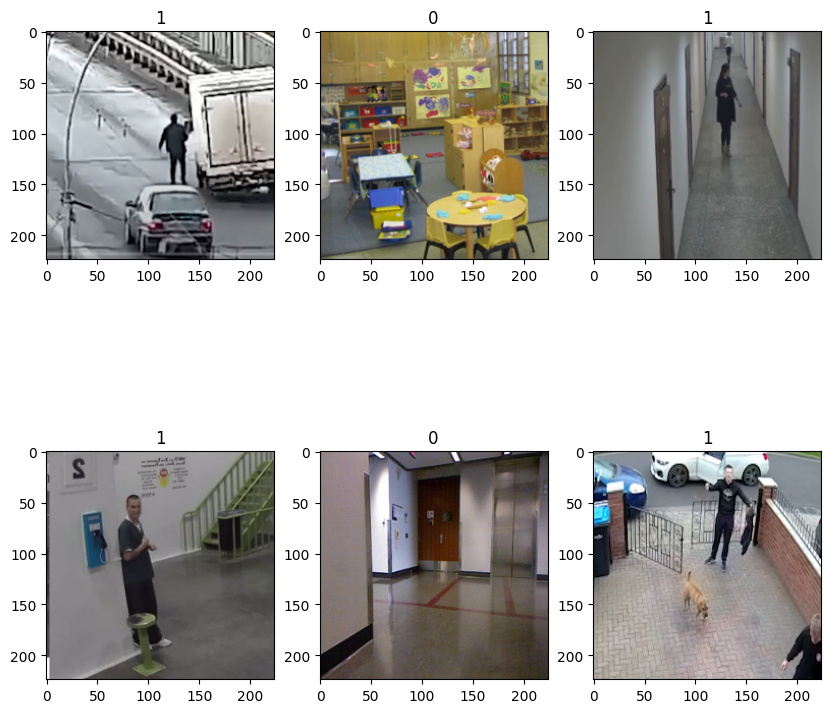

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn

def read_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image {image_path}")
        return None
    image = cv2.resize(image, (224, 224))
    return image

# Define your main directory path
main_dir = "/content/human detection dataset"

# Load and preprocess your dataset
data = []
labels = []
for class_name in os.listdir(main_dir):
    class_dir = os.path.join(main_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = read_and_preprocess_image(image_path)
        if image is not None:
            data.append(image)
            labels.append(class_name)

# Convert data to numpy array and labels to integers
data = np.array(data, dtype=np.uint8)
label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_mapping[label] for label in labels])
labels = np.reshape(labels, (-1, 1))

# Verify the shape of data and labels
print(data.shape)
print(labels.shape)

# Plotting some images
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    ind = rn.choice(range(0, data.shape[0]))
    img1 = cv2.cvtColor(data[ind], cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    plt.title(str(labels[ind][0]))
plt.show()

CNN

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6272193 (23.93 MB)
Trainable params: 6238081 (23.8

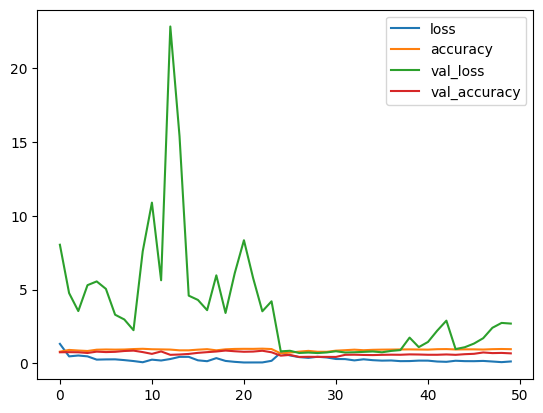

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

# Function to read and preprocess images
def read_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize the image to [0, 1]
    return image

# Load and preprocess your dataset
dataset_path = '/content/human detection dataset'
data = []
labels = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = read_and_preprocess_image(image_path)
            data.append(image)
            labels.append(int(class_name))  # Assuming class names are '0' and '1'

# Convert lists to numpy arrays
imgs = np.array(data, dtype=np.float32)
labels = np.array(labels, dtype=np.uint8)

# Reshape labels
labels = np.reshape(labels, (-1, 1))

# Define the model
inputs = Input(shape=(224, 224, 3))
feature_ext = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')(inputs)
model = Flatten()(feature_ext)
model = Dense(64, activation="relu")(model)
model = Dense(1, activation="sigmoid")(model)

model = models.Model(inputs=inputs, outputs=model)
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.25, random_state=42)

# Shape of all
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=50, validation_data=(x_test, y_test))

# Plot the training results
df_res = pd.DataFrame(history.history)
df_res.plot()
plt.show()

Vanilla CNN model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 193600)            0         
                                                                 
 batch_normalization (Batch  (None, 193600)            7

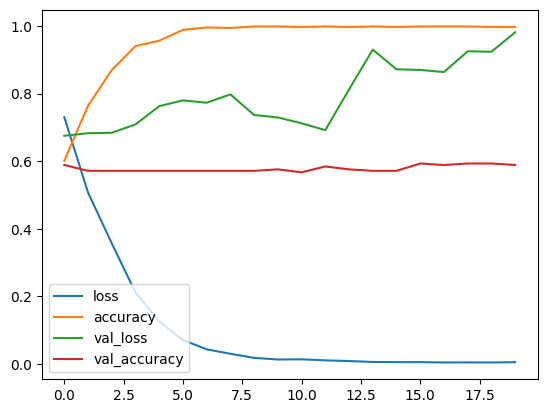

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, Flatten

# Function to read and preprocess images
def read_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize the image to [0, 1]
    return image

# Load and preprocess your dataset
dataset_path = '/content/human detection dataset'
data = []
labels = []
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = read_and_preprocess_image(image_path)
            data.append(image)
            labels.append(int(class_name))  # Assuming class names are '0' and '1'

# Convert lists to numpy arrays
imgs = np.array(data, dtype=np.float32)
labels = np.array(labels, dtype=np.uint8)

# Reshape labels
labels = np.reshape(labels, (-1, 1))

# Split the data
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.25, random_state=42)

# Define the vanilla CNN model
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Plot the training results
df_res = pd.DataFrame(history.history)
df_res.plot()
plt.show()

8/8 [==============================] - 1s 98ms/step


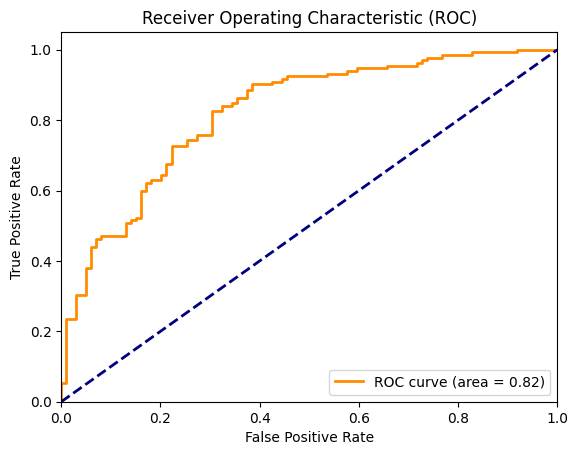

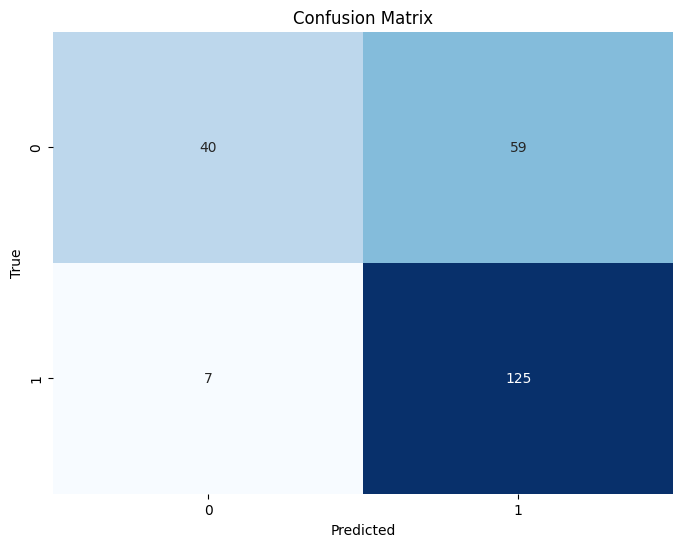

              precision    recall  f1-score   support

           0       0.85      0.40      0.55        99
           1       0.68      0.95      0.79       132

    accuracy                           0.71       231
   macro avg       0.77      0.68      0.67       231
weighted avg       0.75      0.71      0.69       231

Accuracy: 0.7143
F1 Score: 0.7911


In [18]:
# Predict probabilities for ROC curve
y_pred_prob = model.predict(x_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

VGG16

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_7 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1

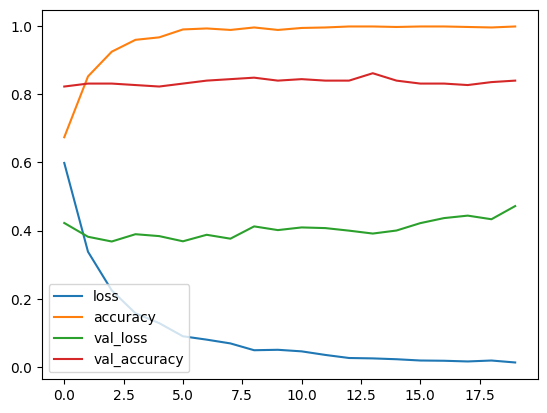

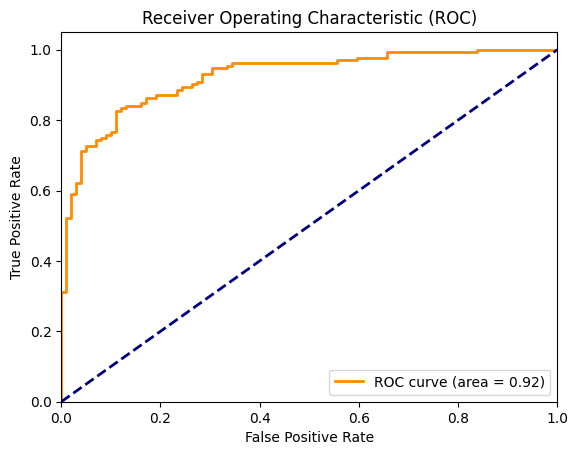

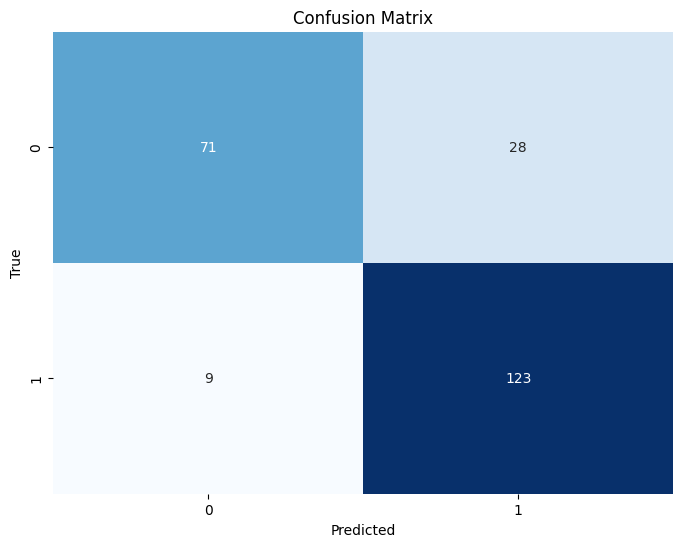

              precision    recall  f1-score   support

           0       0.89      0.72      0.79        99
           1       0.81      0.93      0.87       132

    accuracy                           0.84       231
   macro avg       0.85      0.82      0.83       231
weighted avg       0.85      0.84      0.84       231

Accuracy: 0.8398
F1 Score: 0.8693


In [14]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the VGG16 model pre-trained on ImageNet, excluding the top fully connected layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of VGG16 to prevent them from being trained
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the VGG16 base model
model = Sequential()
model.add(vgg16)

# Add custom layers on top of VGG16
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Plotting the training history
df_res = pd.DataFrame(history.history)
df_res.plot()

# Predict probabilities for ROC curve
y_pred_prob = model.predict(x_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

Xception

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_11 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 46552105 (177.58 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Epoch

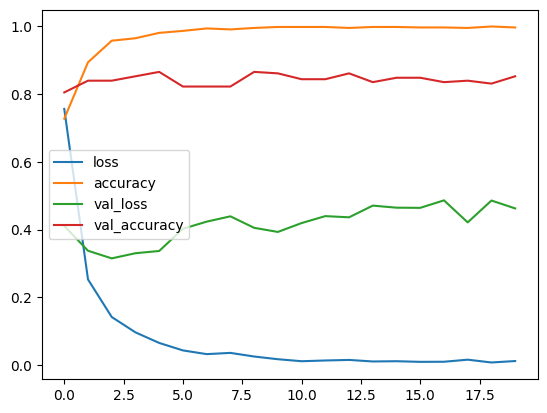

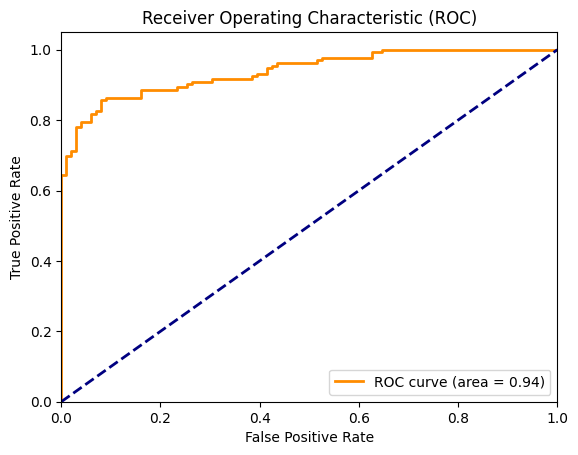

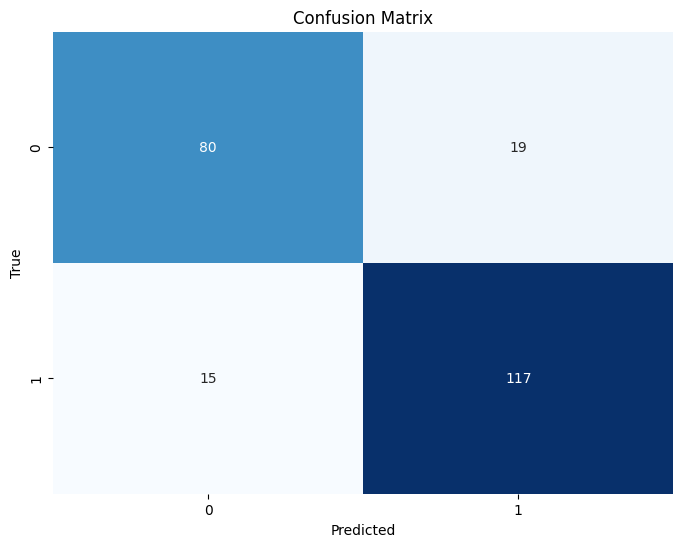

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.86      0.89      0.87       132

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231

Accuracy: 0.8528
F1 Score: 0.8731


In [16]:
from keras.applications import Xception
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Xception model pre-trained on ImageNet, excluding the top fully connected layers
xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of Xception to prevent them from being trained
for layer in xception.layers:
    layer.trainable = False

# Create a new model and add the Xception base model
model = Sequential()
model.add(xception)

# Add custom layers on top of Xception
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Plotting the training history
df_res = pd.DataFrame(history.history)
df_res.plot()

# Predict probabilities for ROC curve
y_pred_prob = model.predict(x_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

ResNet50

94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_13 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 49278337 (187.98 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
______

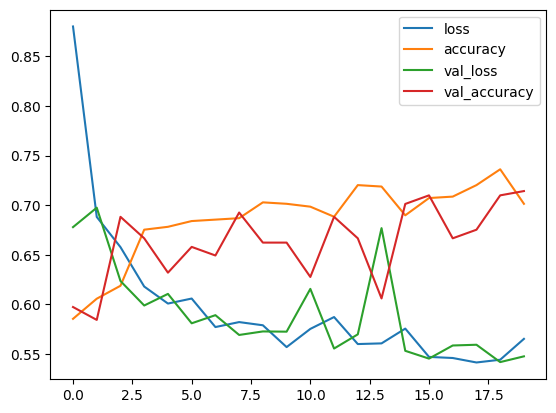

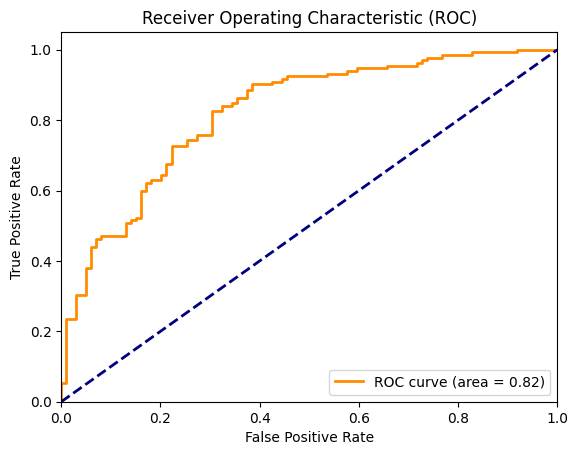

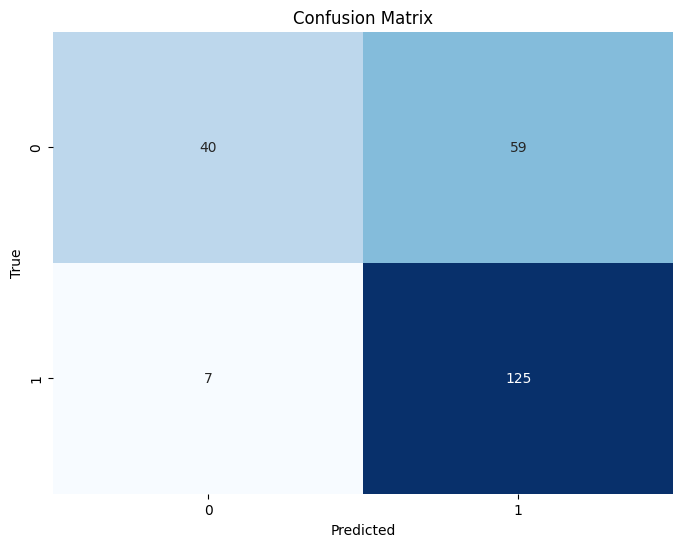

              precision    recall  f1-score   support

           0       0.85      0.40      0.55        99
           1       0.68      0.95      0.79       132

    accuracy                           0.71       231
   macro avg       0.77      0.68      0.67       231
weighted avg       0.75      0.71      0.69       231

Accuracy: 0.7143
F1 Score: 0.7911


In [17]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the ResNet50 model pre-trained on ImageNet, excluding the top fully connected layers
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of ResNet50 to prevent them from being trained
for layer in resnet.layers:
    layer.trainable = False

# Create a new model and add the ResNet50 base model
model = Sequential()
model.add(resnet)

# Add custom layers on top of ResNet50
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Plotting the training history
df_res = pd.DataFrame(history.history)
df_res.plot()

# Predict probabilities for ROC curve
y_pred_prob = model.predict(x_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

CNN model classification report, auc-roc curve, accuracy, f1 score

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 193600)            0         
                                                                 
 batch_normalization_10 (Ba  (None, 193600)           

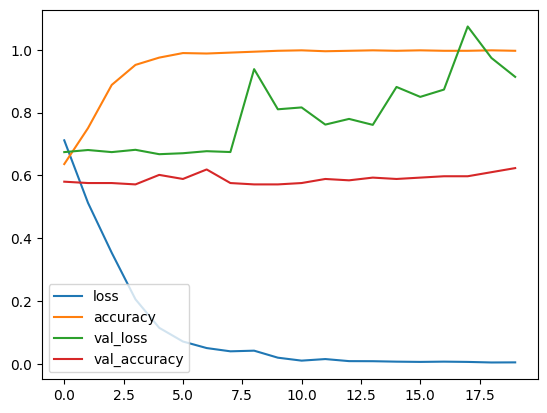

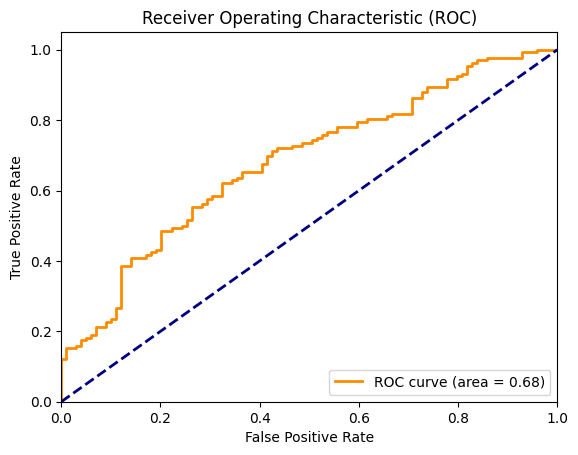

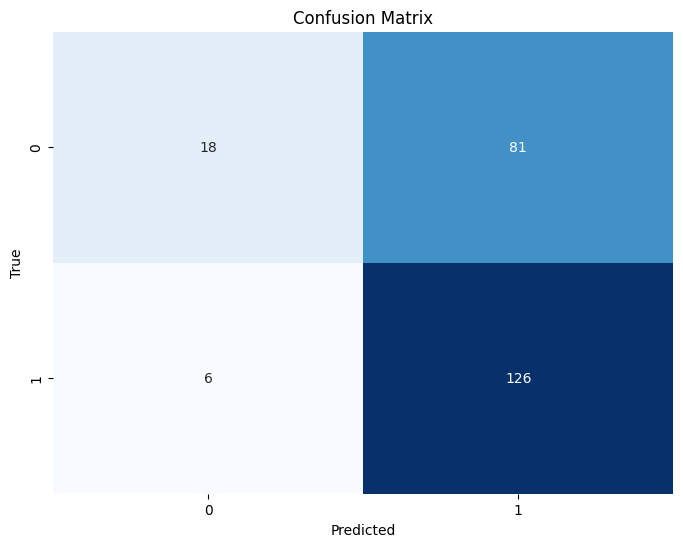

              precision    recall  f1-score   support

           0       0.75      0.18      0.29        99
           1       0.61      0.95      0.74       132

    accuracy                           0.62       231
   macro avg       0.68      0.57      0.52       231
weighted avg       0.67      0.62      0.55       231

Accuracy: 0.6234
F1 Score: 0.7434


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, Flatten
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Plotting the training history
df_res = pd.DataFrame(history.history)
df_res.plot()

# Predict probabilities for ROC curve
y_pred_prob = model.predict(x_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

With an accuracy of 85.28%, Xception model has the highest accuracy